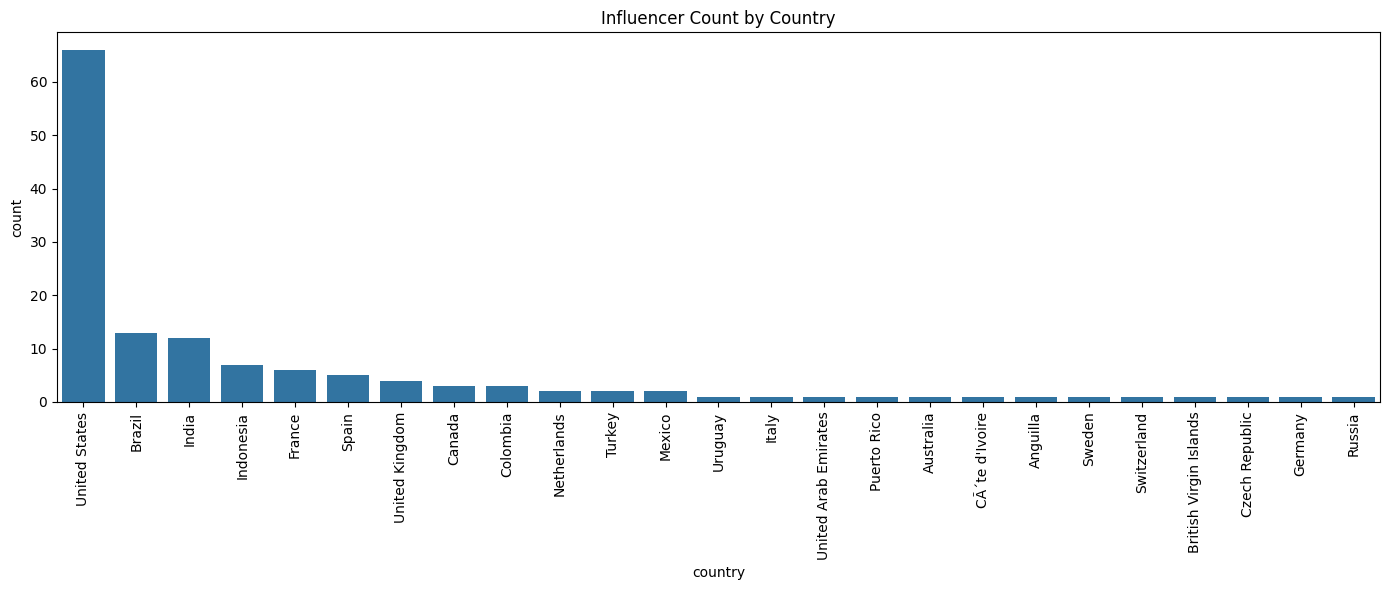

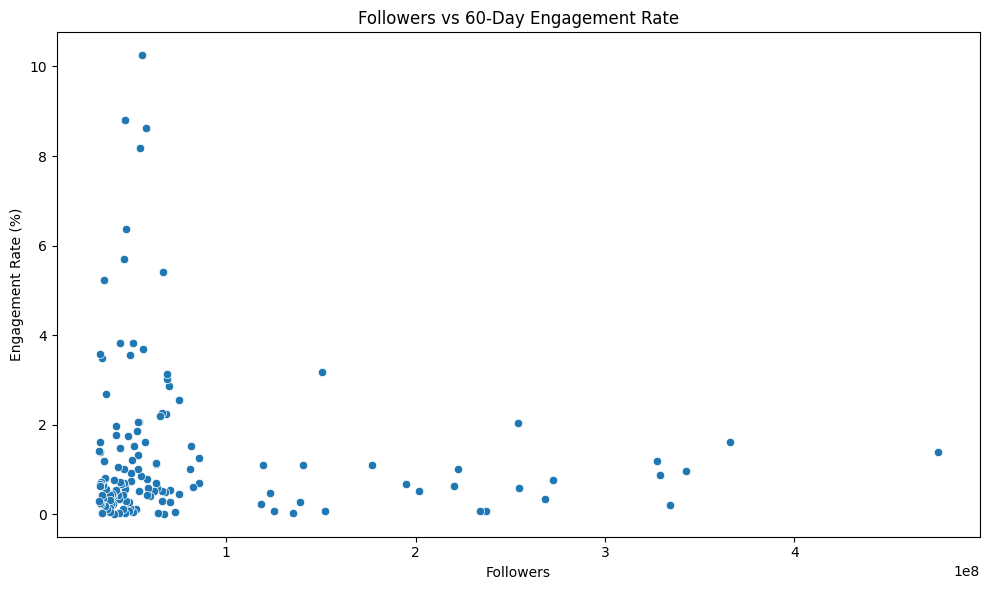

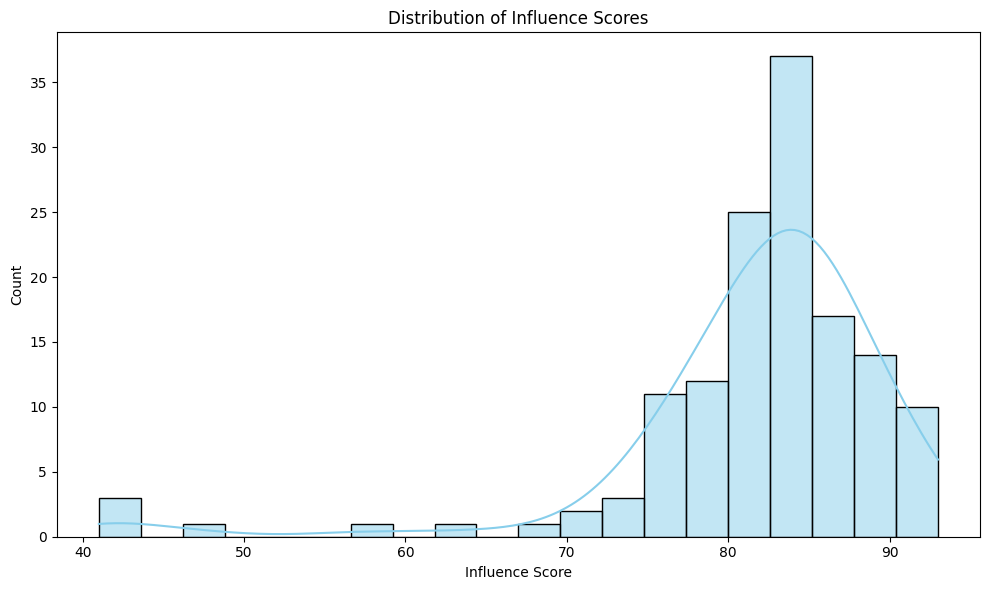

Regression Evaluation
MSE: 47.80476785714284
R2 Score: -0.8456166839021022


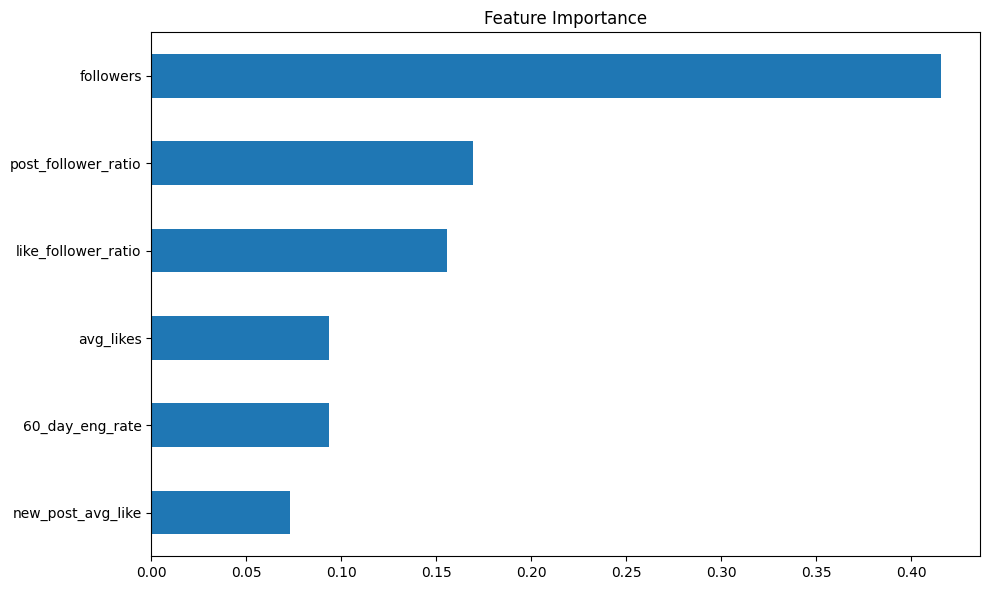


Classification Report
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         4
         Low       0.50      1.00      0.67        13
      Medium       0.50      0.09      0.15        11

    accuracy                           0.50        28
   macro avg       0.33      0.36      0.27        28
weighted avg       0.43      0.50      0.37        28

Accuracy: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


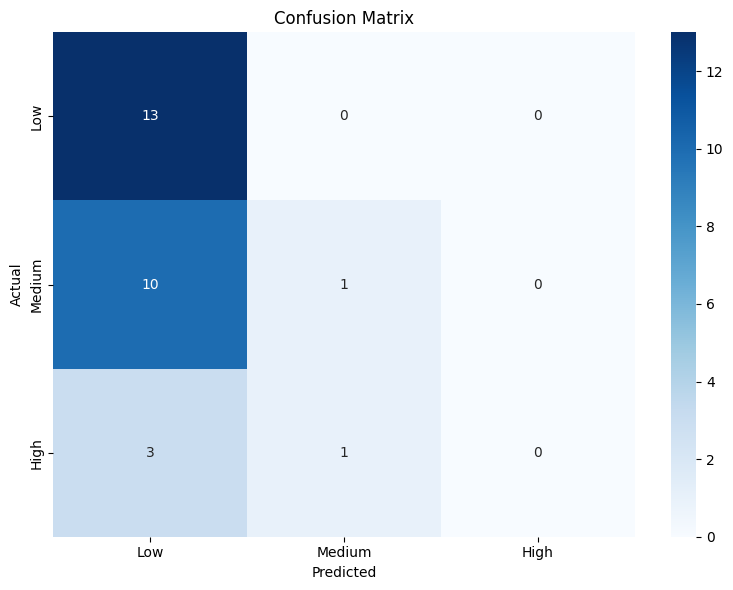

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv("top_insta_influencers_data.csv")

# Clean and preprocess
replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
columns_to_convert = ['total_likes', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like']
df[columns_to_convert] = df[columns_to_convert].replace(replace, regex=True).astype(float)

# Drop duplicates and fill missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# EDA: Plot country distribution
plt.figure(figsize=(14, 6))
sns.countplot(x=df['country'], order=df['country'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Influencer Count by Country")
plt.tight_layout()
plt.show()

# Plot: Followers vs Engagement Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['followers'], y=df['60_day_eng_rate'])
plt.title("Followers vs 60-Day Engagement Rate")
plt.xlabel("Followers")
plt.ylabel("Engagement Rate (%)")
plt.tight_layout()
plt.show()

# Plot: Influence Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['influence_score'], kde=True, color='skyblue')
plt.title("Distribution of Influence Scores")
plt.xlabel("Influence Score")
plt.tight_layout()
plt.show()

# Feature Engineering
df['like_follower_ratio'] = df['total_likes'] / df['followers']
df['post_follower_ratio'] = df['posts'] / df['followers']
df['avg_likes_ratio'] = df['avg_likes'] / df['followers']

# ========== Regression: Predict Influence Score ==========
features = ['followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like',
            'like_follower_ratio', 'post_follower_ratio']
X = df[features]
y = df['influence_score']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model_rf.predict(X_test_scaled)
print("Regression Evaluation")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Feature Importance
plt.figure(figsize=(10, 6))
pd.Series(model_rf.feature_importances_, index=features).sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# ========== Classification: Engagement Rate Category ==========
# Define engagement rate classes
bins = [0, 1, 3, df['60_day_eng_rate'].max()]
labels = ['Low', 'Medium', 'High']
df['engagement_class'] = pd.cut(df['60_day_eng_rate'], bins=bins, labels=labels)

# Encode categorical features
le = LabelEncoder()
df['country_encoded'] = le.fit_transform(df['country'])

X_class = df[['followers', 'influence_score', 'country_encoded']]
y_class = df['engagement_class']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_c, y_train_c)

# Evaluate classifier
y_pred_c = classifier.predict(X_test_c)
print("\nClassification Report")
print(classification_report(y_test_c, y_pred_c))
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))

# Confusion Matrix
plt.figure(figsize=(8, 6))
conf_mat = confusion_matrix(y_test_c, y_pred_c, labels=labels)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
